<br>
<br>
<br>

<h1 align="center"> Admin waits for incoming research proposals </h1>
<img src="../CCAIO workshop imgs/steps/w.svg" style="width:100%"/><br>
<br>
<br>

<h1 align="center">Part 3</h1>

<h1 align="center">Admin responds to incoming questions</h1>

<center><img src="../CCAIO workshop imgs/steps/30.svg" align="center" style="width:90%"/></center>

This involves:
- review the incoming requests
- decide whether the requests are compliant with the admin's organisation requirements
- approve or deny accordingly each request
</br>

# 3.1. Review of the research proposal and code
<center><img src="../CCAIO workshop imgs/steps/31.svg" align="center" style="width:90%"/></center>


In [1]:
%%capture
import syft as sy

# Logging as admin to the server
admin_client = sy.login(port=8087, email="info@openmined.org", password="changethis")

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/ina/Repos/demo/demo


<DomainClient: dailymotion_node>
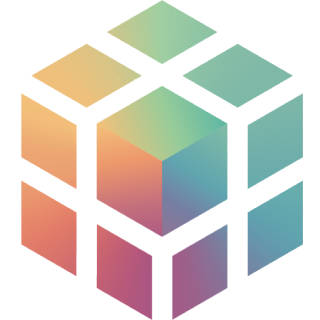

In [2]:
admin_client

## Review: research project proposal

In [3]:
project = admin_client.projects[0]
project

syft.service.project.project.Project

**Approval of the project**: The project proposes an interesting question that is aligned with the initial motivation, so we can review it further.

## Review: the code requests attached to the project

The admin is responsible for enforcing the data usage and release policies stated before. 

<center><img src="../CCAIO workshop imgs/steps/-4.svg" align="center" style="width:90%"/></center>

In the future, the enforcement of policies is to be more and more automatic. 

#### Reviewing 1st request

In [4]:
request_1 = project.requests[0]
request_1.code

```python
class UserCode
    id: UID = 21027f2444f44b99826d95402763f309
    status.approved: bool = False
    service_func_name: str = suggestiveness_in_top10pp_videos
    shareholders: list = ['dailymotion_node']
    code:

@sy.syft_function_single_use(df=asset)
def suggestiveness_in_top10pp_videos(df):
    from io import BytesIO
    import numpy as np
    import matplotlib.pyplot as plt

    def most_popular_videos_in_dataset(data):
        # Select the top 10% of the videos by number of recommendations
        count_top10p = int(0.1 * data.size)
        top10_threshold = data['recommendations'].nlargest(count_top10p).iloc[-1].astype(float)  
        top_posts = data[data['recommendations'] > top10_threshold]
        return top_posts

    # Select most popular videos (top 10%)
    top_posts = most_popular_videos_in_dataset(df)
    top_posts_per_algo = [most_popular_videos_in_dataset(df[df['algo'] == x]) for x in ['A', 'B', 'C']]
    to_plot = [x['suggestive'].to_list() for x in [df, top_posts] + top_posts_per_algo]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12,8))
    bp = ax.boxplot(to_plot, sym='k+', positions=np.arange(len(to_plot)) + 1, vert=True, patch_artist=True, notch=True)

    colors = ['pink', 'lightblue', 'lightgreen', 'lavender']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.yaxis.grid(True)
    ax.set_title('Most popular videos\' sugestiveness', size=18)
    ax.set_ylabel('Suggestiveness ', fontsize=16)
    ax.set_xticks(range(7),['', 'All videos', 'Top posts', 'Top posts Alg.1', 'Top posts Alg.2', 'Top posts Alg.3', ''], size=14)

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    return figfile

```

The code is compliant because:
- releases aggregate statistics
- does not release information about any individual

#### Reviewing 2nd request

In [5]:
request_2 = project.requests[1]
request_2.code

```python
class UserCode
    id: UID = d886fdedb2474dc2b01da2edab0a7314
    status.approved: bool = False
    service_func_name: str = get_outliers
    shareholders: list = ['dailymotion_node']
    code:

@sy.syft_function_single_use(df=asset)
def get_outliers(df, x_axis = 'suggestive', y_axis = 'recommendations', category_seriesname = 'algo', threshold = 6):
    # Code author: Jiahao Chen
    import numpy as np
    import pandas as pd
    from sklearn.covariance import MinCovDet

    # Pick out outliers per category
    categories = sorted(df[category_seriesname].unique())
    results = []
    for category_label in categories:
        df_outliers = df[df[category_seriesname] == category_label]
        X = df_outliers[[x_axis, y_axis]].to_numpy()

        # fit a MCD robust estimator to data
        robust_cov = MinCovDet().fit(X)

        # Outliers
        df_outliers = df_outliers[df_outliers[x_axis] > robust_cov.location_[0]]
        df_outliers = df_outliers[df_outliers[y_axis] > robust_cov.location_[1]]

        # Filter for data in the upper right quadrant
        X = X[np.logical_and(X[:,0] > robust_cov.location_[0], X[:,1] > robust_cov.location_[1])]

        # Compute Mahalanobis distance (squared)
        df_outliers['distance'] = robust_cov.mahalanobis(np.c_[df_outliers[x_axis].to_numpy(),
                                        df_outliers[y_axis].to_numpy()])

        # Only consider points exceeding the threshold number of standard deviations
        df_outliers = df_outliers[df_outliers['distance'] > threshold]

        results.append(df_outliers)
    
    df_results = pd.concat(results)
    
    # Sort by Mahalanobis distance
    df_results = df_results.sort_values('distance', ascending=False)
    
    return df_results

```

The 2nd request releases a very small sample of the videos, flagged to be considered outliers (highest suggestiveness or number of recommendations or both).



Releasing a **very** small sample of isolated highly suggestive or highly recommended videos *doesn't* reveal personal information. However, it could posses a few risks - for example: 
- **Indirectly impact content creators**: 
    - researcher can learn patterns of the recommender system, and gain a competitive advantage on the platform
- **Privacy and consent**: 
    - analysis reveals videos considered most toxic on the platform. This could potentially harm the reputation or privacy of content creators.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Interactive Open Governance Question</p>
    Is it ethical to release such a very small scale sample, given possible risks for the platform users, to advance our understanding of algorithms?</div>



</br>
</br>
</br>
</br>
</br>

### Our perspective

<div class="admonition alert alert-info">
    <p>The above request could be approved. </p>
    <p>The initial legal agreements researcher <> company can state the bounds of how the findings can be used. In reality, a very-small scale of the data outliers can hardly allow someone to build a competitive advantage.   </p>  
    <p>At the same time, a real sample - in particular of harmful content - provides significant understanding to the researcher of the data and can meaningfully help the company improve their systems.</p></div>
</br>
</br>
</br>
</br>
</br>

## 2.2 Review the execution output

<center><img src="../CCAIO workshop imgs/steps/32.svg" align="center" style="width:90%"/></center>

In [6]:
real_data = admin_client.datasets[0].assets[0]

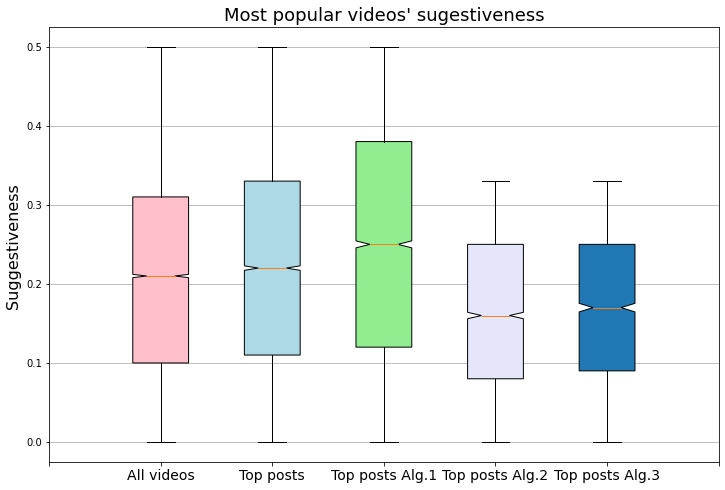

In [7]:
# Running 1st request
request_1.code.unsafe_function(df=real_data)

In [9]:
# Running 2nd request
request_2.code.unsafe_function(df=real_data)

,suggestive,algo,recommendations,title,desc,tags,distance
3723,0.33,C,99972.0,Episode 1/1 Features But,"<br Thiên une comment, hindi<br live, and Pas ...",None,6.114848
10905,0.33,C,99900.0,Life 2023 replay del Clip S12 كاملة,for còn New Episode Singh starring the /><br <...,san,6.105507
13972,0.33,B,199822.0,"Son 13, Love Covid-19",journey Merci bakal dopo The FIFA,Episode,6.003413


</br>
</br>
</br>
</br>

## 2.3 Submits the final answer back to all requests

<center><img src="../CCAIO workshop imgs/steps/33.svg" align="center" style="width:90%"/></center>


### Responding to each...

In [10]:
# Approve the first
request_1.approve()

Request approved for domain dailymotion_node


SyftSuccess: Request 2dc981a41e06435babe6c7d027008a44 changes applied

In [11]:
# Approve the second
request_2.approve()

Request approved for domain dailymotion_node


SyftSuccess: Request bef7075bb00f400aa41ec792faae72e6 changes applied

In [ ]:
# However, the admin could have denied it:
# request_2.deny(reason="This request requires releasing a subsample of the impression data and video metadata, which could put the privacy of our users at risk.")

<br>
<br>
<br>

<h1 align="center"> Admin waits to review the findings</h1>
<img src="../CCAIO workshop imgs/steps/w.svg" style="width:100%"/><br>

<br>
<br>